# Bandit Problem

In [347]:
# imports
from bandits import Bandit
import random
import matplotlib.pyplot as plt
import numpy as np
import math
# Include your imports here, if any are used. 

A bandit is one option (or “arm”) you can choose, where the reward you get is uncertain and must be learned by trying it out.
In multi-armed bandits, you repeatedly pick among several such uncertain options to find which one pays best.

A list of ten bandit objects initialized in the list...

In [348]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]

To generate reward from that bandit, use the pullLever() command

In [349]:
bandits[0].pullLever()

-4.818843666766579

## Greedy algorithm Implementation

In [350]:
bandits = [Bandit(random.random()*4-2) for _ in range(10)]
no_of_steps=1000
expected_value=np.zeros(10)
no_of_times_chosen=np.zeros(10)
rewards=np.zeros(no_of_steps)
def run_greedy() :
    for j in range(no_of_steps) :
        maximum_expected_value = np.max(expected_value)
        list_of_maximum_indices = []
        for i in range(10) :
            if expected_value[i] == maximum_expected_value :
                list_of_maximum_indices.append(i)
        choosen_index=np.random.choice(list_of_maximum_indices)
        choosen_bandit=bandits[choosen_index]
        reward=choosen_bandit.pullLever()
        expected_value[choosen_index]=(expected_value[choosen_index]*no_of_times_chosen[choosen_index]+reward)/(no_of_times_chosen[choosen_index]+1)
        no_of_times_chosen[choosen_index]+=1
        rewards[j]=reward
    return rewards

Plot the cumulative average of rewards as the number of iterations increases. and display that image below.

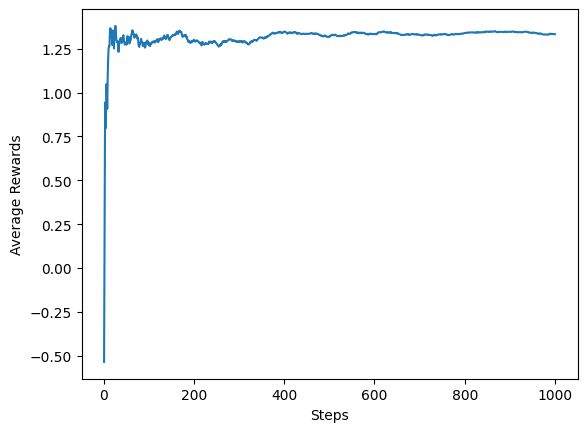

In [371]:
rewards_average=np.cumsum(run_greedy())/np.arange(1,no_of_steps+1)
x_axis=np.arange(1,no_of_steps+1)
plt.plot(x_axis,rewards_average)
plt.xlabel("Steps")
plt.ylabel("Average Rewards")
plt.show()

## $\epsilon$-greedy Algorithm

In [385]:
def run_epsilon_greedy(epsilon) :
    expected_value = np.zeros(10)
    no_of_times_chosen = np.zeros(10)
    rewards=np.zeros(no_of_steps)
    for j in range(no_of_steps) :
        x = np.random.rand()
        if x >= epsilon:
            maximum_expected_value = np.max(expected_value)
            list_of_maximum_indices = []
            for i in range(10):
                if expected_value[i] == maximum_expected_value:
                    list_of_maximum_indices.append(i)
            chosen_index = np.random.choice(list_of_maximum_indices)

        else:
            chosen_index = np.random.choice(np.arange(10))
        chosen_bandit = bandits[chosen_index]
        reward = chosen_bandit.pullLever()
        expected_value[chosen_index] = (expected_value[chosen_index] * no_of_times_chosen[chosen_index] + reward) / (
                    no_of_times_chosen[chosen_index] + 1)
        no_of_times_chosen[chosen_index] += 1
        rewards[j]=reward
    return rewards


  

Plot the cumulative average of rewards as the number of iterations increases but for various values of $\epsilon$.

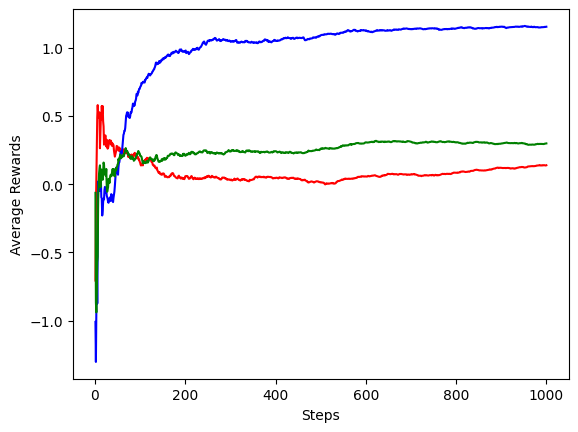

In [423]:
rewards_average1=np.cumsum(run_epsilon_greedy(0)) / np.arange(1, no_of_steps+1)
rewards_average2=np.cumsum(run_epsilon_greedy(0.1)) / np.arange(1, no_of_steps+1)
rewards_average3=np.cumsum(run_epsilon_greedy(0.01)) / np.arange(1, no_of_steps+1)

x_axis=np.arange(1,no_of_steps+1)
plt.plot(x_axis,rewards_average1,color='red')
plt.plot(x_axis,rewards_average2,color='blue')
plt.plot(x_axis,rewards_average3,color='green')
plt.xlabel("Steps")
plt.ylabel("Average Rewards")
plt.show()

## Finding the optimal $\epsilon$

Run the $\epsilon$-greedy algorithm for 1000 iterations and find the optimal $\epsilon$ value by plotting the cumulative average of rewards for various values of $\epsilon$

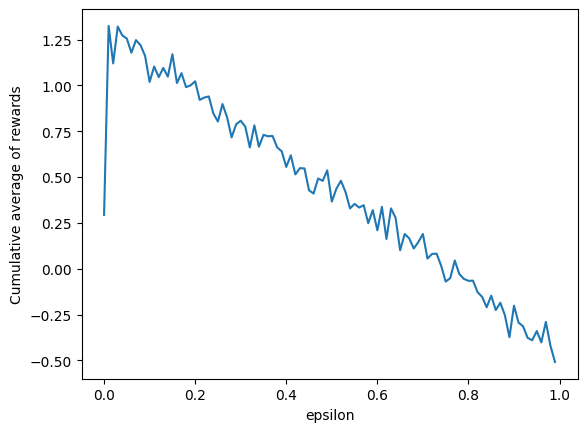

In [425]:
def epsilon_greedy_reward(epsilon) :
    expected_value = np.zeros(10)
    no_of_times_chosen = np.zeros(10)
    rewards=np.zeros(no_of_steps)
    for j in range(no_of_steps) :
        x = np.random.rand()
        if x >= epsilon:
            maximum_expected_value = np.max(expected_value)
            list_of_maximum_indices = []
            for i in range(10):
                if expected_value[i] == maximum_expected_value:
                    list_of_maximum_indices.append(i)
            chosen_index = np.random.choice(list_of_maximum_indices)

        else:
            chosen_index = np.random.choice(np.arange(10))
        chosen_bandit = bandits[chosen_index]
        reward = chosen_bandit.pullLever()
        expected_value[chosen_index] = (expected_value[chosen_index] * no_of_times_chosen[chosen_index] + reward) / (
                    no_of_times_chosen[chosen_index] + 1)
        no_of_times_chosen[chosen_index] += 1
        rewards[j]=reward
    return np.sum(rewards)/(no_of_steps)
epsil=np.linspace(0,1,100,endpoint=False)
rewards_list=[]
for i in range(100) :
    rewards_list.append(epsilon_greedy_reward(epsil[i]))
plt.plot(epsil,rewards_list)
plt.xlabel("epsilon")
plt.ylabel("Cumulative average of rewards")
plt.show()



## Optimistic Initial Values

In [427]:
def run_optimistic_greedy():
    epsilon=0
    expected_value = np.ones(10)*10
    no_of_times_chosen = np.zeros(10)
    rewards=np.zeros(no_of_steps)
    for j in range(no_of_steps) :
        x = np.random.rand()
        if x >= epsilon:
            maximum_expected_value = np.max(expected_value)
            list_of_maximum_indices = []
            for i in range(10):
                if expected_value[i] == maximum_expected_value:
                    list_of_maximum_indices.append(i)
            chosen_index = np.random.choice(list_of_maximum_indices)

        else:
            chosen_index = np.random.choice(np.arange(10))
        chosen_bandit = bandits[chosen_index]
        reward = chosen_bandit.pullLever()
        expected_value[chosen_index] = (expected_value[chosen_index] * no_of_times_chosen[chosen_index] + reward) / (
                    no_of_times_chosen[chosen_index] + 1)
        no_of_times_chosen[chosen_index] += 1
        rewards[j]=reward
    return rewards


Plot the cumulative average of rewards as the number of iterations increases for an optimistic greedy of $Q_1 = 10$ and a non-optimistic $\epsilon = 0.1$ and try to compare which is better.

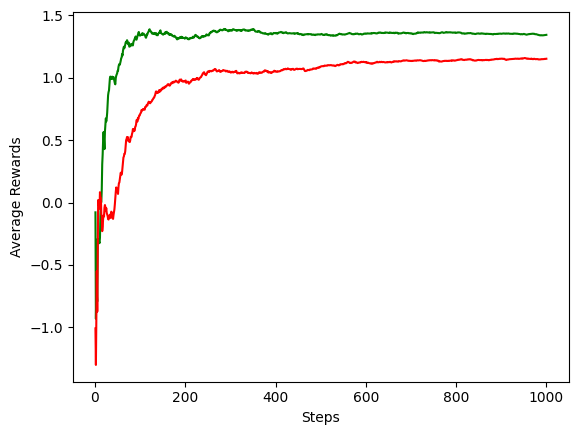

In [428]:
rewards_average=np.cumsum(run_optimistic_greedy())/np.arange(1,no_of_steps+1)
plt.plot(np.arange(1,no_of_steps+1),rewards_average,color='green')
plt.plot(np.arange(1,no_of_steps+1),rewards_average2,color='red')
plt.xlabel("Steps")
plt.ylabel("Average Rewards")
plt.show()

## Upper Confidence Bound (UCB)

In [430]:
def run_ucb(c):
    expected_value=np.ones(10)*1000
    no_of_times_chosen=np.zeros(10)
    rewards=np.zeros(no_of_steps)
    for j in range(no_of_steps) :
        maximum_expected_value = np.max(expected_value)
        list_of_maximum_indices = []
        for i in range(10) :
            if expected_value[i] == maximum_expected_value :
                list_of_maximum_indices.append(i)
        choosen_index=np.random.choice(list_of_maximum_indices)
        choosen_bandit=bandits[choosen_index]
        reward=choosen_bandit.pullLever()
        for k in range(10) :
            if k == choosen_index :
                if expected_value[choosen_index] == 1000 :
                    expected_value[choosen_index] = reward + c*math.sqrt(math.log(j+1))
                else :
                    expected_value[choosen_index] = ((expected_value[choosen_index]-c*math.sqrt(math.log(j)/no_of_times_chosen[choosen_index]))*no_of_times_chosen[choosen_index]+reward)/(no_of_times_chosen[choosen_index]+1)
                    expected_value[choosen_index] += c*math.sqrt(math.log(j+1)/(no_of_times_chosen[choosen_index]+1))
            elif expected_value[k] == 1000 :
                expected_value[k] = 1000
            else :
                expected_value[k] = expected_value[k] -c*math.sqrt(math.log(j)/no_of_times_chosen[k]) +c*math.sqrt(math.log(j+1)/no_of_times_chosen[k])
        no_of_times_chosen[choosen_index] += 1
        rewards[j]=reward
    return rewards    

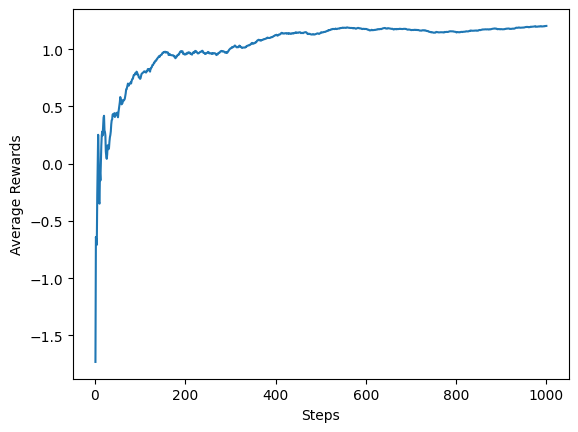

In [431]:
c=2
rewards_average_ucb=np.cumsum(run_ucb(c))/np.arange(1,no_of_steps+1)
plt.plot(x_axis,rewards_average_ucb)
plt.xlabel("Steps")
plt.ylabel("Average Rewards")
plt.show()